In [ ]:
! pip install prophet

In [ ]:
from prophet import Prophet
import pandas as pd
import numpy as np

tesla = pd.read_csv('TSLA.csv')
tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
1,2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2,2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
3,2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
4,2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000
...,...,...,...,...,...,...,...
2513,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2514,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2515,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
2516,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300


In [ ]:
tesla['Date'] = pd.to_datetime(tesla['Date'])
tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
1,2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2,2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
3,2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
4,2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000
...,...,...,...,...,...,...,...
2513,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2514,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2515,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
2516,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300


In [ ]:
complete_date_range = pd.date_range(start = '2013-01-01', end = '2023-01-01')
df_dates = pd.DataFrame(complete_date_range, columns=['Date'])
df = pd.merge(df_dates, tesla, on='Date', how='left')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000.0
2,2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000.0
3,2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500.0
3649,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300.0
3650,2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157777300.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for column in columns:
    df[column].interpolate(method='linear', inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000.0
2,2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000.0
3,2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000.0
4,2013-01-05,2.320000,2.320000,2.260889,2.292000,2.292000,8950000.0
...,...,...,...,...,...,...,...
3648,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500.0
3649,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300.0
3650,2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157777300.0
3651,2022-12-31,119.949997,124.480003,119.750000,123.180000,123.180000,157777300.0


In [ ]:
df.fillna(method='bfill', inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,2.333333,2.363333,2.314000,2.357333,2.357333,17922000.0
1,2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000.0
2,2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000.0
3,2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000.0
4,2013-01-05,2.320000,2.320000,2.260889,2.292000,2.292000,8950000.0
...,...,...,...,...,...,...,...
3648,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500.0
3649,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300.0
3650,2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157777300.0
3651,2022-12-31,119.949997,124.480003,119.750000,123.180000,123.180000,157777300.0


In [ ]:
tesla_closing_price = df[['Date','Close']]
tesla_closing_price

,Date,Close
0,2013-01-01,2.357333
1,2013-01-02,2.357333
2,2013-01-03,2.318000
3,2013-01-04,2.293333
4,2013-01-05,2.292000
...,...,...
3648,2022-12-28,112.709999
3649,2022-12-29,121.820000
3650,2022-12-30,123.180000
3651,2022-12-31,123.180000


In [ ]:
tesla_data = tesla_closing_price.rename(columns={'Date': 'ds', 'Close': 'y'})
tesla_data

,ds,y
0,2013-01-01,2.357333
1,2013-01-02,2.357333
2,2013-01-03,2.318000
3,2013-01-04,2.293333
4,2013-01-05,2.292000
...,...,...
3648,2022-12-28,112.709999
3649,2022-12-29,121.820000
3650,2022-12-30,123.180000
3651,2022-12-31,123.180000


In [ ]:
split_index = int(tesla_data.shape[0] * 0.8)
train_data = tesla_data.iloc[:split_index]
test_data = tesla_data.iloc[split_index:]

In [ ]:
train_data

,ds,y
0,2013-01-01,2.357333
1,2013-01-02,2.357333
2,2013-01-03,2.318000
3,2013-01-04,2.293333
4,2013-01-05,2.292000
...,...,...
2917,2020-12-27,221.069996
2918,2020-12-28,221.229996
2919,2020-12-29,221.996674
2920,2020-12-30,231.593338


In [ ]:
test_data

,ds,y
2922,2021-01-01,237.231663
2923,2021-01-02,239.239998
2924,2021-01-03,241.248333
2925,2021-01-04,243.256668
2926,2021-01-05,245.036667
...,...,...
3648,2022-12-28,112.709999
3649,2022-12-29,121.820000
3650,2022-12-30,123.180000
3651,2022-12-31,123.180000


In [ ]:
model = Prophet(daily_seasonality=True)


In [ ]:
model.fit(train_data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpqxbfudn5/80ihq3ge.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqxbfudn5/eswv6t_q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83236', 'data', 'file=/tmp/tmpqxbfudn5/80ihq3ge.json', 'init=/tmp/tmpqxbfudn5/eswv6t_q.json', 'output', 'file=/tmp/tmpqxbfudn5/prophet_modelvx5kzq3d/prophet_model-20240118154502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:45:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:45:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_data = model.make_future_dataframe(periods=len(test_data),freq='D')
future_data

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05
...,...
3648,2022-12-28
3649,2022-12-29
3650,2022-12-30
3651,2022-12-31


In [ ]:
forecast = model.predict(future_data)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,2.606933,-10.015260,20.025638,2.606933,2.606933,2.697474,2.697474,2.697474,1.147147,...,0.053473,0.053473,0.053473,1.496854,1.496854,1.496854,0.0,0.0,0.0,5.304407
1,2013-01-02,2.629082,-10.511412,20.919614,2.629082,2.629082,2.218192,2.218192,2.218192,1.147147,...,0.076415,0.076415,0.076415,0.994630,0.994630,0.994630,0.0,0.0,0.0,4.847275
2,2013-01-03,2.651232,-10.271630,18.792364,2.651232,2.651232,1.787636,1.787636,1.787636,1.147147,...,0.135690,0.135690,0.135690,0.504800,0.504800,0.504800,0.0,0.0,0.0,4.438868
3,2013-01-04,2.673381,-10.605777,19.194475,2.673381,2.673381,1.039389,1.039389,1.039389,1.147147,...,-0.140013,-0.140013,-0.140013,0.032256,0.032256,0.032256,0.0,0.0,0.0,3.712770
4,2013-01-05,2.695530,-12.303350,17.409499,2.695530,2.695530,0.637933,0.637933,0.637933,1.147147,...,-0.090727,-0.090727,-0.090727,-0.418487,-0.418487,-0.418487,0.0,0.0,0.0,3.333464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3648,2022-12-28,348.968673,294.425739,417.251079,291.094124,410.471581,4.990387,4.990387,4.990387,1.147147,...,0.076415,0.076415,0.076415,3.766825,3.766825,3.766825,0.0,0.0,0.0,353.959060
3649,2022-12-29,349.243849,293.169624,416.438474,291.163417,410.956606,4.558322,4.558322,4.558322,1.147147,...,0.135690,0.135690,0.135690,3.275485,3.275485,3.275485,0.0,0.0,0.0,353.802171
3650,2022-12-30,349.519026,293.525486,419.134753,291.239630,411.441632,3.779153,3.779153,3.779153,1.147147,...,-0.140013,-0.140013,-0.140013,2.772020,2.772020,2.772020,0.0,0.0,0.0,353.298179
3651,2022-12-31,349.794203,291.576610,418.104503,291.315843,411.910839,3.318419,3.318419,3.318419,1.147147,...,-0.090727,-0.090727,-0.090727,2.261999,2.261999,2.261999,0.0,0.0,0.0,353.112622


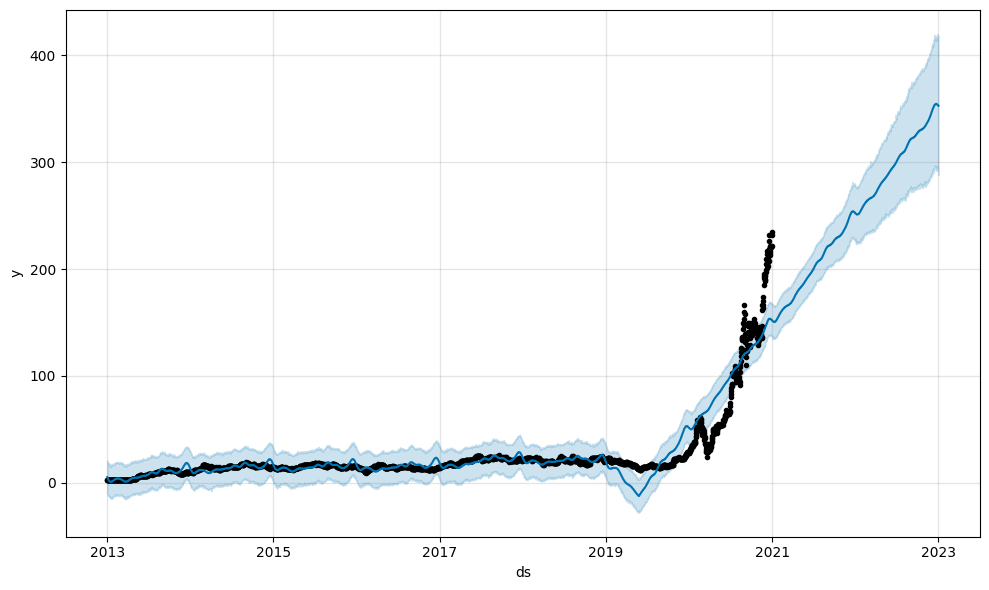

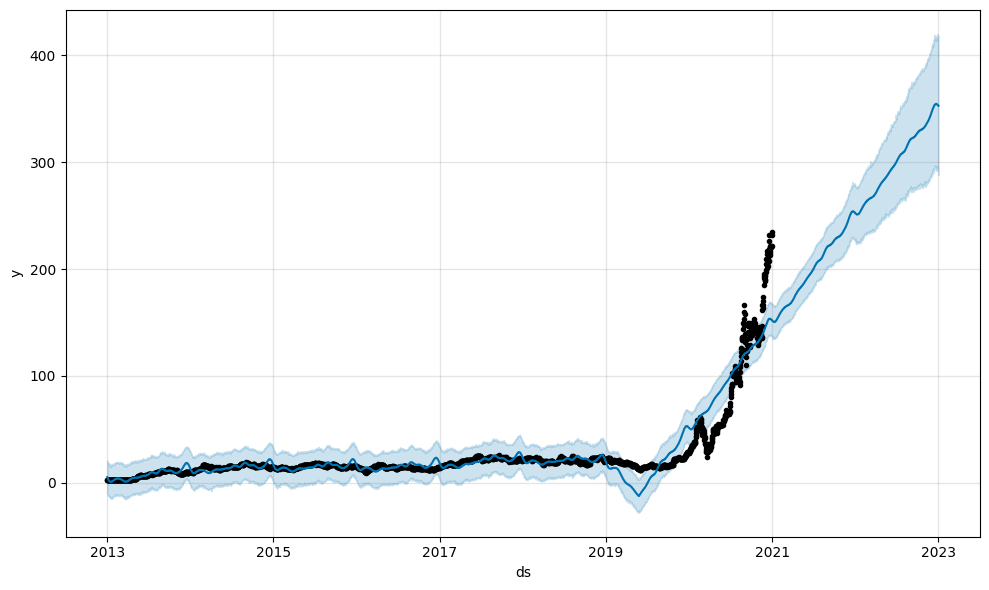

In [ ]:
model.plot(forecast)

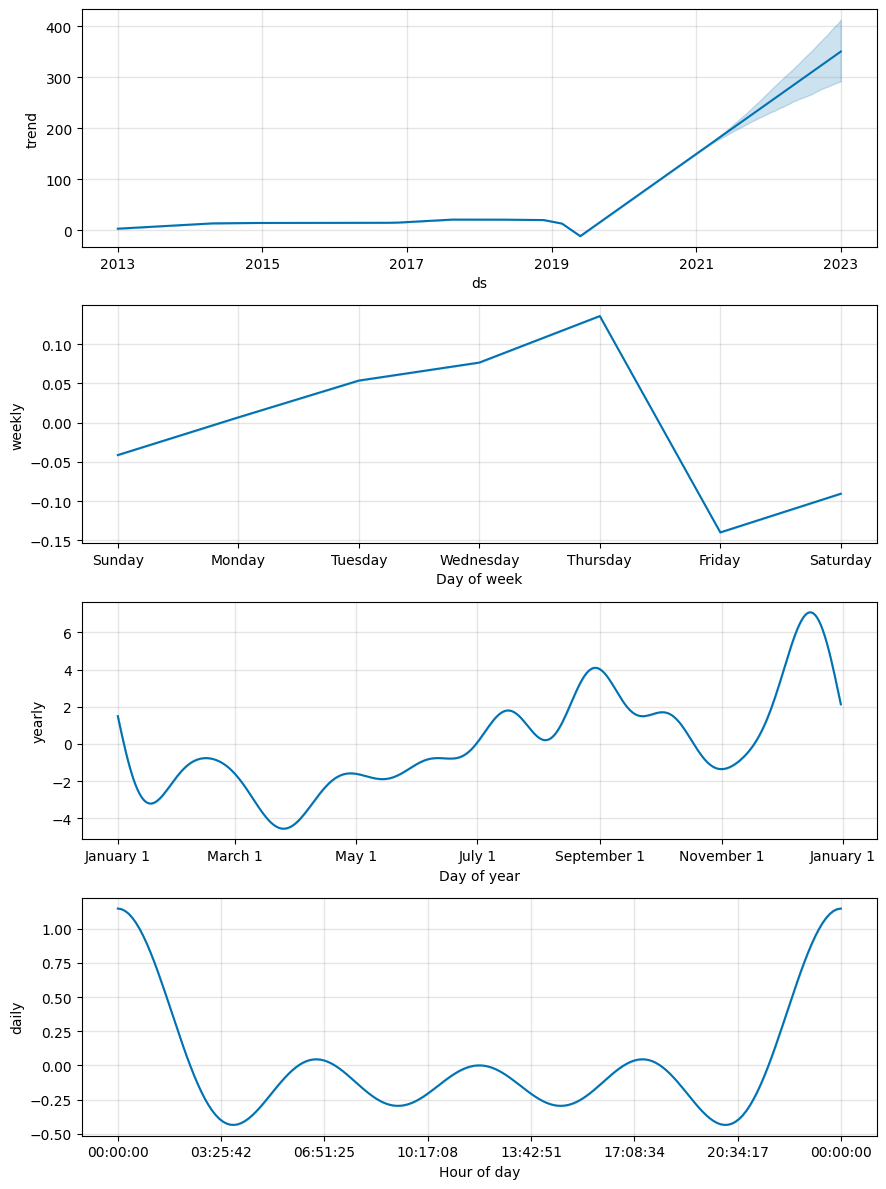

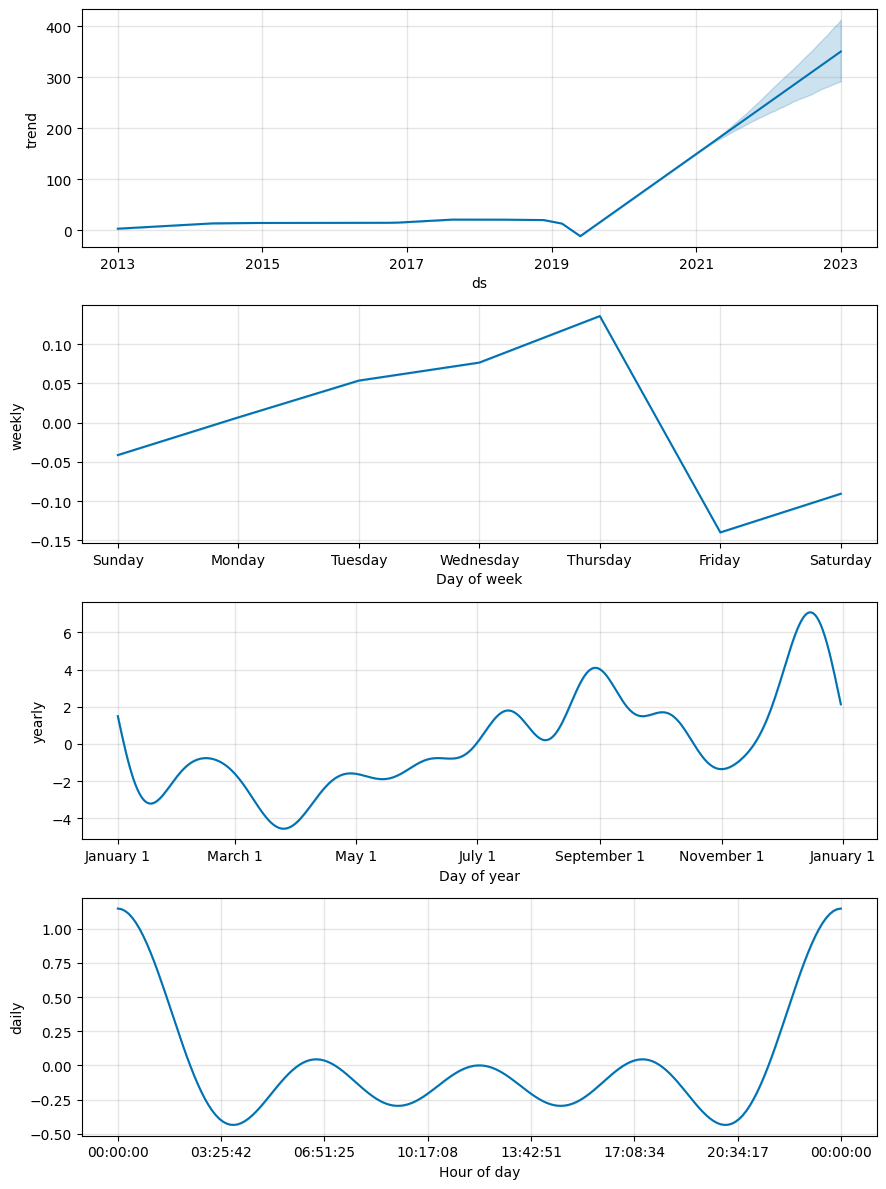

In [ ]:
model.plot_components(forecast)

In [ ]:
df = tesla_data.set_index('ds').join(forecast.set_index('ds'))
df

,y,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2013-01-01,2.357333,2.606933,-10.015260,20.025638,2.606933,2.606933,2.697474,2.697474,2.697474,1.147147,...,0.053473,0.053473,0.053473,1.496854,1.496854,1.496854,0.0,0.0,0.0,5.304407
2013-01-02,2.357333,2.629082,-10.511412,20.919614,2.629082,2.629082,2.218192,2.218192,2.218192,1.147147,...,0.076415,0.076415,0.076415,0.994630,0.994630,0.994630,0.0,0.0,0.0,4.847275
2013-01-03,2.318000,2.651232,-10.271630,18.792364,2.651232,2.651232,1.787636,1.787636,1.787636,1.147147,...,0.135690,0.135690,0.135690,0.504800,0.504800,0.504800,0.0,0.0,0.0,4.438868
2013-01-04,2.293333,2.673381,-10.605777,19.194475,2.673381,2.673381,1.039389,1.039389,1.039389,1.147147,...,-0.140013,-0.140013,-0.140013,0.032256,0.032256,0.032256,0.0,0.0,0.0,3.712770
2013-01-05,2.292000,2.695530,-12.303350,17.409499,2.695530,2.695530,0.637933,0.637933,0.637933,1.147147,...,-0.090727,-0.090727,-0.090727,-0.418487,-0.418487,-0.418487,0.0,0.0,0.0,3.333464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,112.709999,348.968673,294.425739,417.251079,291.094124,410.471581,4.990387,4.990387,4.990387,1.147147,...,0.076415,0.076415,0.076415,3.766825,3.766825,3.766825,0.0,0.0,0.0,353.959060
2022-12-29,121.820000,349.243849,293.169624,416.438474,291.163417,410.956606,4.558322,4.558322,4.558322,1.147147,...,0.135690,0.135690,0.135690,3.275485,3.275485,3.275485,0.0,0.0,0.0,353.802171
2022-12-30,123.180000,349.519026,293.525486,419.134753,291.239630,411.441632,3.779153,3.779153,3.779153,1.147147,...,-0.140013,-0.140013,-0.140013,2.772020,2.772020,2.772020,0.0,0.0,0.0,353.298179


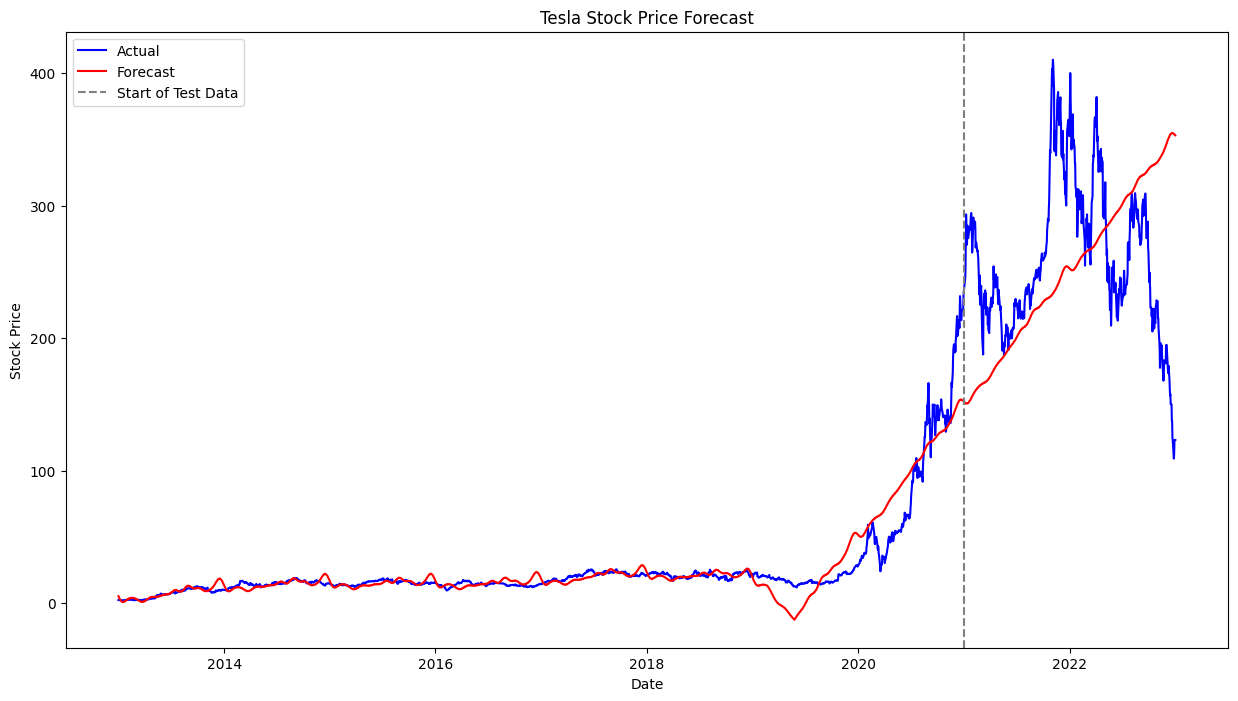

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 8))
plt.plot(df.index, df['y'], label='Actual', color='blue')
plt.plot(df.index, df['yhat'], label='Forecast', color='red')
plt.axvline(x=train_data['ds'].max(), color='gray', linestyle='--', label='Start of Test Data')

plt.title('Tesla Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae_train = mean_absolute_error(df[:len(train_data)]['y'], df[:len(train_data)]['yhat'])
mae_test = mean_absolute_error(df[len(train_data):]['y'], df[len(train_data):]['yhat'])


print('The MAE for train is',mae_train)
print('The MAE for test is',mae_test)

The MAE for train is 6.312550274902382
The MAE for test is 66.49379684110022


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mse_train = mean_squared_error(df[:len(train_data)]['y'], df[:len(train_data)]['yhat'])
mse_test = mean_squared_error(df[len(train_data):]['y'], df[len(train_data):]['yhat'])

print('The MSE for train is',mse_train)
print('The MSE for test is',mse_test)

The MSE for train is 141.8185621812194
The MSE for test is 7086.481677295926


In [ ]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('The RMSE for train is', rmse_train)
print('The RMSE for test is', rmse_test)

The RMSE for train is 11.90875989266806
The RMSE for test is 84.18124302536715
